# REGRESSION

Regression models (both linear and non-linear) are used for predicting a real value, like salary for example. If your independent variable is time, then you are forecasting future values, otherwise your model is predicting present but unknown values. Regression technique vary from Linear Regression to SVR and Random Forests Regression.

## 1. SIMPLE LINEAR REGRESSION

y = b0 + b1 X1        

1. y -> dependent variable
2. b0 -> y-intercept (constant)
3. b1 -> slope (change in y for a one unit change in x)
4. X1 -> Independent variable

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
dataset=pd.read_csv("Salary_Data.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [20]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [21]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [22]:
#train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Training Simple Linear Regression model on Training Set

In [23]:
#Regression:- Continuous value  Classification:- discrete values/ classes

from sklearn.linear_model import LinearRegression

r=LinearRegression()

#fit function connects linear model to our dataset
r.fit(X_train,y_train)


LinearRegression()

Predicting the Test Results

In [24]:
y_pred=r.predict(X_test)

In [25]:
y_pred

array([ 40748.96, 122699.62,  64961.66,  63099.14, 115249.56, 107799.5 ])

In [26]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431], dtype=int64)

In [27]:
r.score(X_train,y_train)

0.9411949620562126

In [28]:
r.score(X_test,y_test) 

0.988169515729126

Visualising Training set Results

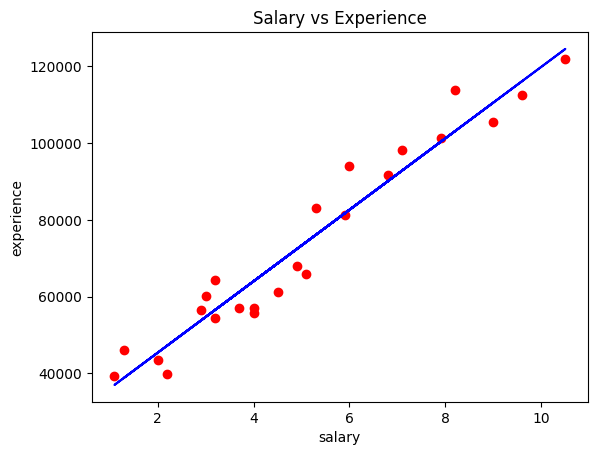

In [29]:
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,r.predict(X_train),color='blue')
plt.title('Salary vs Experience')
plt.xlabel('salary')
plt.ylabel('experience')
plt.show()

Visualising Test Set results

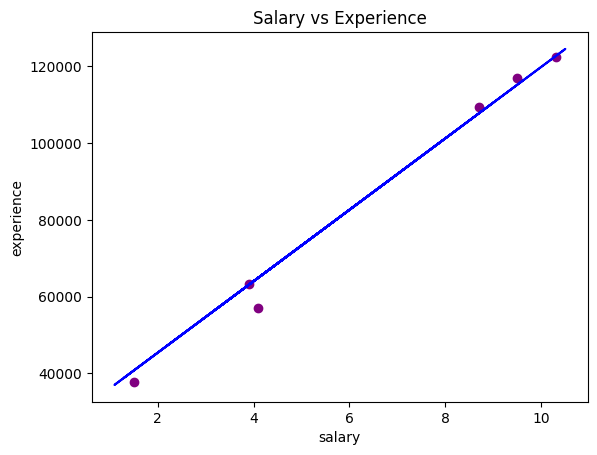

In [30]:
plt.scatter(X_test,y_test,color="purple")
plt.plot(X_train,r.predict(X_train),color='blue')
plt.title('Salary vs Experience')
plt.xlabel('salary')
plt.ylabel('experience')
plt.show()

Making a single prediction (for example the salary of an employee with 12 years of experience)

:- Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

12→scalar 

[12]→1D array 

[[12]]→2D array

In [31]:
print(r.predict([[12]]))

[138531.]


Getting the final linear regression equation with the values of the coefficients

In [32]:
print(r.coef_)
print(r.intercept_)

[9312.58]
26780.09915062818


## 2. MULTI-LINEAR REGRESSION

y = b0 + b1 X1 + b2 X2 + b3 X3 ..... + bn Xn

In [33]:
dataset=pd.read_csv("50_Startups.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [34]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [35]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [36]:
#anscombe quatrat
dataset.isnull().sum()   #checking for null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

ENCODING THE CATEGORICAL DATA:- Dummy Variables 

: - for changing categorical vaules into numerical values while using it in regression models

In [37]:
#one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[3])],remainder="passthrough")
X=np.array(ct.fit_transform(X))

In [39]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [40]:
#Multiple linear regression u dont need to apply feature scaling as the coefficients will balance out the independent variables putting all in same scale

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
X_train

array([[0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [0.0, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [0.0, 1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
       [0.0, 0.0, 1.0, 65605.48, 153032.06, 107138.38],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 1.0, 0.0, 61994.48, 115641.28, 91131.24],
       [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1.0, 0.0, 0.0, 23640.93, 96189.63, 148001.11],
       [1.0, 0.0, 0.0, 76253.86, 113867.3, 298664.47],
       [0.0, 0.0, 1.0, 15505.73, 127382.3, 35534.17],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       

In [42]:
X_test

array([[0.0, 1.0, 0.0, 66051.52, 182645.56, 118148.2],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
       [0.0, 1.0, 0.0, 73994.56, 122782.75, 303319.26],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [43]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

applying multiple linear model regression

In [44]:
# the class multivariable linear regression will take care of the dummy variable trap by itself so you dont need to skip any column by your own & also do backward elimination itself

from sklearn.linear_model import LinearRegression

mr=LinearRegression()

mr.fit(X_train,y_train)



LinearRegression()

Predicting the Test Results

In [46]:
y_pred=mr.predict(X_test)

np.set_printoptions(precision=2)  #print value upto 2 decimal places

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))      #reshape displays values vertically, 1-> vertical

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [47]:
mr.score(X_train,y_train) 

0.9501847627493607

In [48]:
mr.score(X_test,y_test) 

0.934706847328201

In [49]:
mr.score(X_test,y_pred)

1.0

In [ ]:
mr.predict([[12]])

PRACTICE SET

In [ ]:
dataset=pd.read_csv("Data.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [ ]:
#Removing missing values

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,1:3])
X[:,1:3]=imputer.transform(X[:,1:3])

In [ ]:
np.nan

nan

In [ ]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
#Encoding categorical data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ob=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder="passthrough")

X=np.array(ob.fit_transform(X))

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=np.array(le.fit_transform(y))

In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
#train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [ ]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [ ]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
y_test

array([0, 1])

In [ ]:
#Feature Scaling    (do after train test split)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train[:,4:6]=sc.fit_transform(X_train[:,4:6])
X_test[:,4:6]=sc.transform(X_test[:,4:6])

In [ ]:
X_train

array([[1.0, 0.0, 0.0, 35.0, -0.6260377781240918],
       [1.0, 0.0, 0.0, 44.0, 1.0130429500553495],
       [1.0, 0.0, 0.0, 48.0, 1.8325833141450703],
       [0.0, 1.0, 0.0, 30.0, -1.0943465576039322],
       [1.0, 0.0, 0.0, 37.0, 0.42765697570554906],
       [0.0, 1.0, 0.0, 40.0, 0.05040823668012247],
       [0.0, 0.0, 1.0, 38.0, -0.27480619351421154],
       [0.0, 0.0, 1.0, 38.77777777777778, -1.3285009473438525]],
      dtype=object)

In [ ]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 2.3008920936249107],
       [0.0, 0.0, 1.0, 27.0, -1.7968097268236927]], dtype=object)